# 1. Dataset and background

## Background

The dataset is provided by PetFinder.my, an animal welfare platform. The dataset features the data of adopted stray pets, including their breed, color, age and adoption speed.

### Hypothesis

The lower the age, the faster the adoption speed

### Loading the data

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv('datasett/meow_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     14963 non-null  int64  
 1   PetID          14963 non-null  object 
 2   Type           14963 non-null  object 
 3   Name           14963 non-null  object 
 4   Age            14963 non-null  int64  
 5   Breed1         14963 non-null  object 
 6   Breed2         14963 non-null  object 
 7   Gender         14963 non-null  object 
 8   Color1         14963 non-null  object 
 9   Color2         14963 non-null  object 
 10  Color3         14963 non-null  object 
 11  MaturitySize   14963 non-null  object 
 12  FurLength      14963 non-null  object 
 13  Vaccinated     13099 non-null  object 
 14  Dewormed       13186 non-null  object 
 15  Sterilized     13155 non-null  object 
 16  Health         14963 non-null  object 
 17  State          14963 non-null  object 
 18  Quanti

### Features description

PetID - Unique hash ID of pet profile

AdoptionSpeed - Categorical speed of adoption. Lower is faster

Type - Type of animal

Name - Name of pet (Empty if not named)

Age - Age of pet when listed, in months

Breed1 - Primary breed of pet

Breed2 - Secondary breed of pet, if pet is of mixed breed

Gender - Gender of pet

Color1 - Color 1 of pet

Color2 - Color 2 of pet

Color3 - Color 3 of pet

MaturitySize - Size at maturity

FurLength - Fur length

Vaccinated - Pet has been vaccinated

Dewormed - Pet has been dewormed

Sterilized - Pet has been spayed / neutered

Health - Health Condition

Quantity - Number of pets represented in profile

Fee - Adoption fee (0 = Free)

State - State location in Malaysia

RescuerID - Unique hash ID of rescuer

VideoAmt - Total uploaded videos for this pet

PhotoAmt - Total uploaded photos for this pet

Description - Profile write-up for this pet

#### Adoption Speed

0 - Pet was adopted on the same day as it was listed.

1 - Pet was adopted between 1 and 7 days (1st week) after being listed.

2 - Pet was adopted between 8 and 30 days (1st month) after being listed.

3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.

4 - No adoption after 100 days of being listed

In [112]:
df.head()

,Unnamed: 0,PetID,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,...,Vaccinated,Dewormed,Sterilized,Health,State,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed
0,0,86e1089a3,Cat,Nibble,3,Tabby,Tabby,Male,Black,White,...,No,No,No,Healthy,Selangor,1,100,0,1.0,2
1,1,6296e909a,Cat,No Name Yet,1,Domestic Medium Hair,Domestic Medium Hair,Male,Black,Brown,...,NaN,NaN,NaN,Healthy,Kuala Lumpur,1,0,0,2.0,0
2,2,3422e4906,Dog,Brisco,1,Mixed Breed,Mixed Breed,Male,Brown,White,...,Yes,Yes,No,Healthy,Selangor,1,0,0,7.0,3
3,3,5842f1ff5,Dog,Miko,4,Mixed Breed,Mixed Breed,Female,Black,Brown,...,Yes,Yes,No,Healthy,Kuala Lumpur,1,150,0,8.0,2
4,4,850a43f90,Dog,Hunter,1,Mixed Breed,Mixed Breed,Male,Black,Black,...,No,No,No,Healthy,Selangor,1,0,0,3.0,2


# 2. Data Preprocessing

In [113]:
df = df.drop(["Unnamed: 0", "PetID", "Name", "VideoAmt", "PhotoAmt"], axis=1)
df.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,State,Quantity,Fee,AdoptionSpeed
0,Cat,3,Tabby,Tabby,Male,Black,White,White,Small,Short,No,No,No,Healthy,Selangor,1,100,2
1,Cat,1,Domestic Medium Hair,Domestic Medium Hair,Male,Black,Brown,Brown,Medium,Medium,NaN,NaN,NaN,Healthy,Kuala Lumpur,1,0,0
2,Dog,1,Mixed Breed,Mixed Breed,Male,Brown,White,White,Medium,Medium,Yes,Yes,No,Healthy,Selangor,1,0,3
3,Dog,4,Mixed Breed,Mixed Breed,Female,Black,Brown,Brown,Medium,Short,Yes,Yes,No,Healthy,Kuala Lumpur,1,150,2
4,Dog,1,Mixed Breed,Mixed Breed,Male,Black,Black,Black,Medium,Short,No,No,No,Healthy,Selangor,1,0,2


### Remove duplicates

In [114]:
# See if there is duplicates
print(df.duplicated().sum())

1027


In [115]:
# Duplicates found, dropping
df = df.drop_duplicates()

# Check the duplicate rows after dropping
print(df.duplicated().sum())

0


### Removing null

In [116]:
# Check if theres null
print(df.isnull().sum())


Type                0
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated       1766
Dewormed         1679
Sterilized       1757
Health              0
State               0
Quantity            0
Fee                 0
AdoptionSpeed       0
dtype: int64


In [117]:
print(df["Vaccinated"].unique())
print(df["Dewormed"].unique())
print(df["Sterilized"].unique())

['No' nan 'Yes']
['No' nan 'Yes']
['No' nan 'Yes']


In [118]:
df["Vaccinated"] = df["Vaccinated"].map({"No": 0, np.nan: 0, "Yes": 1})
df["Dewormed"] = df["Dewormed"].map({"No": 0, np.nan: 0, "Yes": 1})
df["Sterilized"] = df["Sterilized"].map({"No": 0, np.nan: 0, "Yes": 1})

print(df["Vaccinated"].unique())
print(df["Dewormed"].unique())
print(df["Sterilized"].unique())

[0 1]
[0 1]
[0 1]


### Preprocessing object to ints

In [119]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"'{column}': {unique_values}")
    print('-' * 50)

'Type': ['Cat' 'Dog']
--------------------------------------------------
'Age': [  3   1   4  12   0   2  78   6   8  10  36  14  24   5  72  60   9  48
  62  47 120  32   7  17  22  16  13  19  11  37  18  55  20  28  74  53
  25  84  76  30 132  96  46  15  50  56  54  23  92  29  27  49  44 144
  21  31  41  51  65  34 135  39  52  42 108  81  26  38  69 212  33  75
  95  80  63  61 255  89  91  35 117  73 122 123  64  87 112 156  66  67
  77 180  82  86  40  57 168 102  45 147  68  85  88  43 238 100]
--------------------------------------------------
'Breed1': ['Tabby' 'Domestic Medium Hair' 'Mixed Breed' 'Domestic Short Hair'
 'Domestic Long Hair' 'Terrier' 'Persian' 'Rottweiler' 'Shih Tzu'
 'Siamese' 'Jack Russell Terrier' 'American Shorthair' 'Spitz'
 'Labrador Retriever' 'Pit Bull Terrier' 'Silky Terrier' 'Bombay' 'Husky'
 'Schnauzer' 'Golden Retriever' 'Siberian Husky' 'Collie'
 'German Shepherd Dog' 'Tortoiseshell' 'Doberman Pinscher' 'Calico'
 'American Staffordshire Terrie

No Inconsistant data is found

In [120]:
breed_map = {i: v for i, v in enumerate(set(df["Breed1"].unique()).union(set(df["Breed2"].unique())))}
color_map = {i: v for i, v in enumerate(set(df["Color1"].unique()).union(set(df["Color2"].unique())).union(set(df["Color3"].unique())))}
state_map = {i: v for i, v in enumerate(set(df["State"].unique()))}

type_map = {0: 'Cat', 1: 'Dog'}
gender_map = {0: 'Male', 1: 'Female', 2: 'Mixed'}
size_map = {0: 'Small', 1: 'Medium', 2: 'Large', 3: 'Extra Large'}
length_map = {0: 'Short', 1: 'Medium', 2: 'Long'}
health_map = {0: 'Healthy', 1: 'Minor Injury', 2: 'Serious Injury'}

df["Breed1"] = df["Breed1"].map({v: k for k, v in breed_map.items()})
df["Breed2"] = df["Breed2"].map({v: k for k, v in breed_map.items()})
df["Color1"] = df["Color1"].map({v: k for k, v in color_map.items()})
df["Color2"] = df["Color2"].map({v: k for k, v in color_map.items()})
df["Color3"] = df["Color3"].map({v: k for k, v in color_map.items()})
df["State"] = df["State"].map({v: k for k, v in state_map.items()})

df["Type"] = df["Type"].map({v: k for k, v in type_map.items()})
df["Gender"] = df["Gender"].map({v: k for k, v in gender_map.items()})
df["MaturitySize"] = df["MaturitySize"].map({v: k for k, v in size_map.items()})
df["FurLength"] = df["FurLength"].map({v: k for k, v in length_map.items()})
df["Health"] = df["Health"].map({v: k for k, v in health_map.items()})

In [121]:

for column in df.columns:
    unique_values = df[column].unique()
    print(f"'{column}': {unique_values}")
    print('-' * 50)

'Type': [0 1]
--------------------------------------------------
'Age': [  3   1   4  12   0   2  78   6   8  10  36  14  24   5  72  60   9  48
  62  47 120  32   7  17  22  16  13  19  11  37  18  55  20  28  74  53
  25  84  76  30 132  96  46  15  50  56  54  23  92  29  27  49  44 144
  21  31  41  51  65  34 135  39  52  42 108  81  26  38  69 212  33  75
  95  80  63  61 255  89  91  35 117  73 122 123  64  87 112 156  66  67
  77 180  82  86  40  57 168 102  45 147  68  85  88  43 238 100]
--------------------------------------------------
'Breed1': [151  54 120  86  78  10  70  87  62   4 119  34 122 110  15  97  55 135
  27 114   7 147 181 127 170 108  58  26  68 173 163  93  80 124  77  63
 146 153 158 133 123 157  92 167 118 112 162  79 131  73 183 130 143  82
 171  36 155  40 113  75 177 178 184  57  29 164 142  47  83   0 105  52
  84  85  32 180 104 186  53  11  21  20  45  43 128 185  18  25  23  89
  37 106 100 134 132  94  67 115 169  69 126  65  42 116   3  12 144  6

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13936 entries, 0 to 14961
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Type           13936 non-null  int64
 1   Age            13936 non-null  int64
 2   Breed1         13936 non-null  int64
 3   Breed2         13936 non-null  int64
 4   Gender         13936 non-null  int64
 5   Color1         13936 non-null  int64
 6   Color2         13936 non-null  int64
 7   Color3         13936 non-null  int64
 8   MaturitySize   13936 non-null  int64
 9   FurLength      13936 non-null  int64
 10  Vaccinated     13936 non-null  int64
 11  Dewormed       13936 non-null  int64
 12  Sterilized     13936 non-null  int64
 13  Health         13936 non-null  int64
 14  State          13936 non-null  int64
 15  Quantity       13936 non-null  int64
 16  Fee            13936 non-null  int64
 17  AdoptionSpeed  13936 non-null  int64
dtypes: int64(18)
memory usage: 2.0 MB


In [123]:
df.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,State,Quantity,Fee,AdoptionSpeed
0,0,3,151,151,0,2,6,6,0,0,0,0,0,0,1,1,100,2
1,0,1,54,54,0,2,0,0,1,1,0,0,0,0,13,1,0,0
2,1,1,120,120,0,0,6,6,1,1,1,1,0,0,1,1,0,3
3,1,4,120,120,1,2,0,0,1,0,1,1,0,0,13,1,150,2
4,1,1,120,120,0,2,2,2,1,0,0,0,0,0,1,1,0,2


### Clean noisy data

<Axes: >

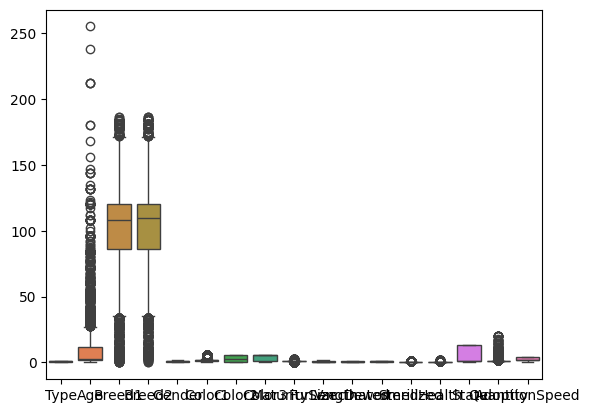

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df.drop(["Fee"], axis=1))

<Axes: >

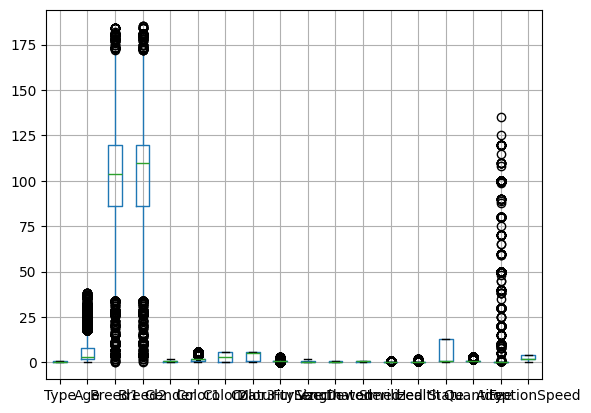

In [125]:
from scipy import stats
df=df[(np.abs(stats.zscore(df['Age'])) < 1.5)]
df=df[(np.abs(stats.zscore(df['Quantity'])) < 1.5)]
df=df[(np.abs(stats.zscore(df['Fee'])) < 1.5)]
df.boxplot()

# 3. Exploratory Data Analysis

### Adoption Speed Correlation

Questions

1. What breed of animals get adopted the quickest?
2. Does the age of the animals influence the speed of adoption?
3. Are vaccinated animals more likely to get adopted?

Since we are trying to find the relationship between features and the adoption speed, we can examine the correlation between various variables and adoption speed bool by using a correlation heatmap.

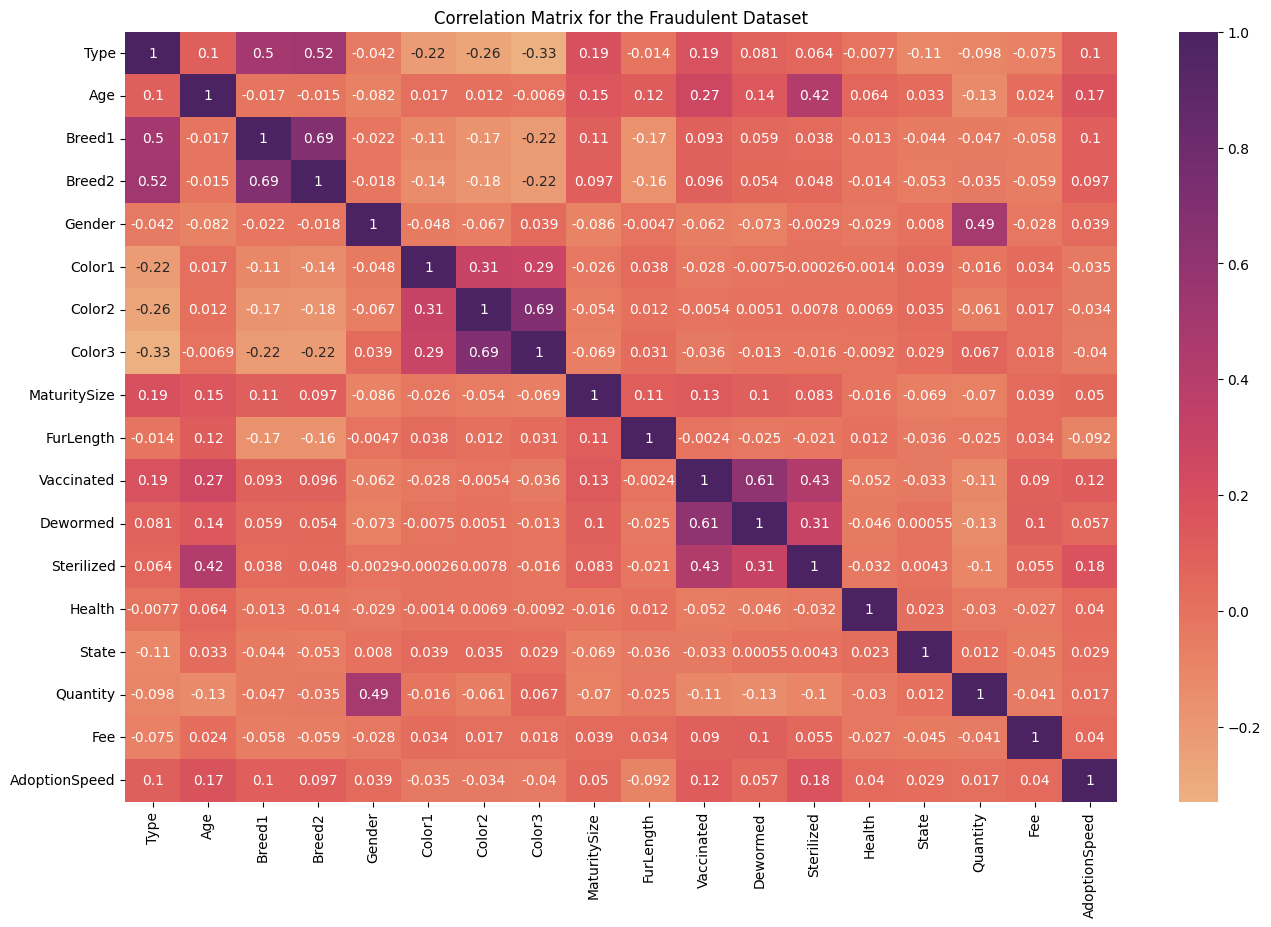

In [126]:
#Size of heatmap figure
plt.figure(figsize=(16,10))

#Create correlation matrix using df.corr and generate a heatmap using sns.heatmap
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette('flare', as_cmap=True))

#Set the title
plt.title('Correlation Matrix for the Fraudulent Dataset')

#show the plot
plt.show()

By examining the last row, we can observe how different columns correlate with 'AdoptionSpeedBool'.

Here are some side notes explaining the meaning of correlation values:

- Correlation values closer to 0 indicate a weak correlation between the two columns.
- Correlation values closer to -1 or 1 indicate a strong correlation between the two columns.

We can see that 'AdoptionSpeedBool' is not positively correlated with any columns, therefore we cannot draw a conclusion right away. AdoptionSpeed is not considered because AdoptionSpeedBool derives from AdoptionSpeed.

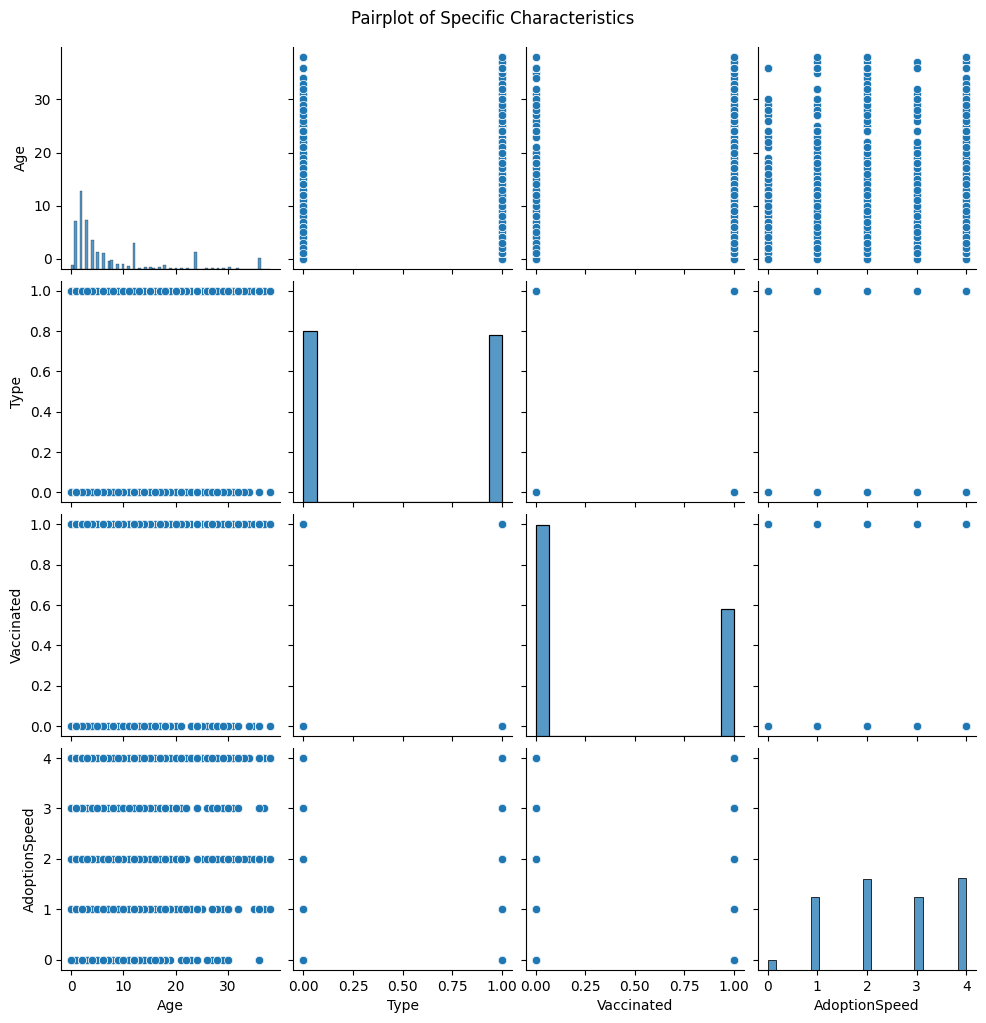

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select specific characteristics
columns_of_interest = ['Age', 'Type', 'Vaccinated', 'AdoptionSpeed']

# Create a pairplot
sns.pairplot(df[columns_of_interest])

# Add a title
plt.suptitle('Pairplot of Specific Characteristics', y=1.02)

# Show the plot
plt.show()


No clear pattern can be observed. Since the datas are discrete, `df.describe()` wont help much.

(but we are still doing it for the sake of completeness)

In [128]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,State,Quantity,Fee,AdoptionSpeed
count,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000
mean,0.494218,6.903235,97.359053,98.388869,0.707355,1.990513,2.972895,3.883267,0.851464,0.436574,0.376310,0.558909,0.200940,0.037224,4.748193,1.239790,6.565866,2.485273
std,0.499989,8.276396,33.694811,32.728606,0.631191,1.623782,2.471522,2.446448,0.539554,0.574328,0.484481,0.496540,0.400721,0.201347,5.230870,0.553262,21.596564,1.184163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,86.000000,86.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000
50%,0.000000,3.000000,104.000000,110.000000,1.000000,2.000000,3.000000,5.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000
75%,1.000000,8.000000,120.000000,120.000000,1.000000,2.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,13.000000,1.000000,0.000000,4.000000
max,1.000000,38.000000,184.000000,185.000000,2.000000,6.000000,6.000000,6.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,13.000000,3.000000,135.000000,4.000000


# 4. Preprocessing for model

To enhance the accuracy of our model predictions, we will further preprocess the data before training.

In [129]:
# one hot encoding
df = pd.get_dummies(df, columns=['Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 'State'], drop_first=True)

# feature engineering
df['AdoptionSpeedBool'] = (df['AdoptionSpeed'] < 3).astype(np.int64)
df = df.drop(["AdoptionSpeed"], axis=1)
df.head()

,Type,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,...,State_5,State_6,State_7,State_8,State_9,State_10,State_11,State_12,State_13,AdoptionSpeedBool
0,0,3,0,0,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,1
1,0,1,0,1,1,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,1
2,1,1,0,1,1,1,1,0,0,1,...,False,False,False,False,False,False,False,False,False,0
4,1,1,0,1,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,1
5,0,3,1,1,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,1


<Axes: ylabel='AdoptionSpeed'>

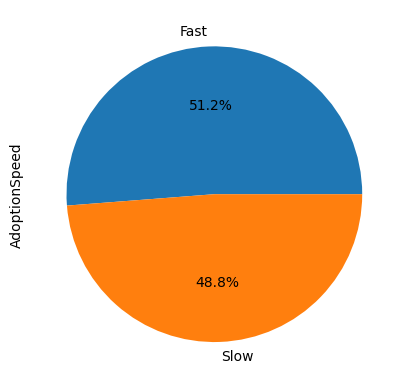

In [130]:
df['AdoptionSpeedBool'].value_counts().plot(kind='pie', autopct='%1.1f%%', ylabel='AdoptionSpeed', labels=["Fast", "Slow"])

We can see that we have quite balanced data points for both fast and slow adoption speed

# 4. Train Model

### Seperating datas

In [131]:
from sklearn.model_selection import train_test_split

# Step 1: Separate features and target
variable = 'AdoptionSpeedBool'
X = df.drop(variable, axis=1)  # Features
y = df[variable]               # Target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Finding the best model

In [132]:
# Import all the necessary libraries for machine learning classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

# Create a list of classification models
classification_model_class = [LogisticRegression,
                              DecisionTreeClassifier,
                              RandomForestClassifier,
                              GaussianNB,
                              XGBClassifier]

# Model performance is created to store the results calculated
model_performance = {
    'ModelName': ['LogisticRegression',
                  'DecisionTreeClassifier',
                  'RandomForestClassifier',
                  'GaussianNB',
                  'XGBClassifier'],
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1_Score': [],
    'RMSE': [],
}

# Loop through each model class
for ModelClass in classification_model_class:
    # Create model with specified arguments
    args = {'random_state': 161223} if ModelClass != GaussianNB else {}
    model = ModelClass(**args)

    # Train data on model
    model.fit(X_train, y_train)

    # Model prediction using the trained model
    y_pred = model.predict(X_test)

    # Evaluation scoring
    model_performance['Model'].append(model)
    model_performance['Accuracy'].append(accuracy_score(y_test, y_pred))
    model_performance['Precision'].append(precision_score(y_test, y_pred))
    model_performance['Recall'].append(recall_score(y_test, y_pred))
    model_performance['F1_Score'].append(f1_score(y_test, y_pred))
    model_performance['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Create DataFrame from the model performance dictionary
model_performance_df = pd.DataFrame(model_performance)

d:\Users\user\CodeProjects\wia1007_meow\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


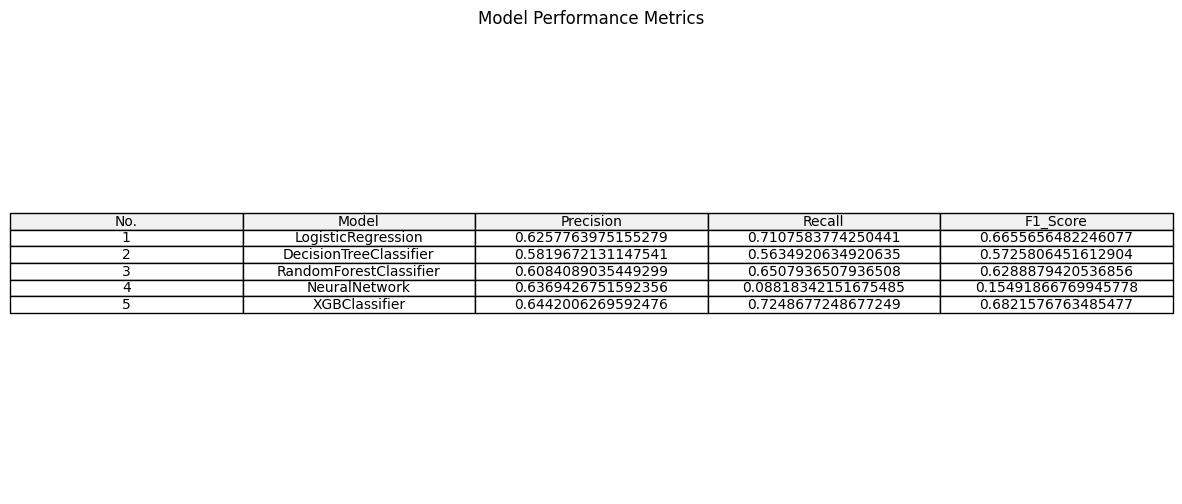

In [133]:
import matplotlib.pyplot as plt

# Add 'No.' column to the DataFrame
model_performance_df['No.'] = range(1, len(model_performance_df) + 1)

# Set 'Model' column with the provided list
model_performance_df['Model'] = ['LogisticRegression',
                                'DecisionTreeClassifier',
                                'RandomForestClassifier',
                                'NeuralNetwork',
                                'XGBClassifier']

# Select the columns you want in the table
table_columns = ['No.', 'Model', 'Precision', 'Recall', 'F1_Score']

# Display the table in a matplotlib table
fig, ax = plt.subplots(figsize=(15, 6))
ax.axis('off')  # Hide axes

# Create the table
table_data = model_performance_df[table_columns].values
table = ax.table(cellText=table_data, colLabels=table_columns, cellLoc='center', loc='center', colColours=["#f2f2f2"] * len(table_columns))
table.auto_set_font_size(False)
table.set_fontsize(10)

# Add a title
plt.title('Model Performance Metrics')

# Show the table
plt.show()


Text(0.5, 1.0, 'RMSE')

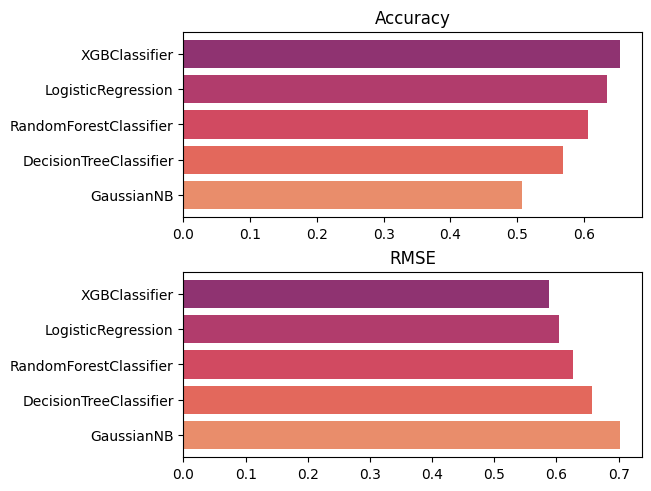

In [134]:
# Visualize model performance by creating two subplots ax1 and ax2
fig, (ax1, ax2) = plt.subplots(2, layout='constrained')

#Arrange the models from lowest to highest accuracy for better visualization.
model_performance_df.sort_values(by='Accuracy', inplace=True)
#Horizontal bar chart is created on the first subplot (ax1). ( y-axis: 'ModelName', x-axis : 'Accuracy')
ax1.barh(model_performance_df['ModelName'], model_performance_df['Accuracy'], color=sns.color_palette('flare'))
#Set title of subplot ax1
ax1.set_title('Accuracy')

#Arrange the models from highest to lowest RMSE for better visualization.
model_performance_df.sort_values(by='RMSE', ascending=False, inplace=True)
#Horizontal bar chart is created on the second subplot (ax2). ( y-axis: 'ModelName', x-axis : 'RMSE')
ax2.barh(model_performance_df['ModelName'], model_performance_df['RMSE'], color=sns.color_palette('flare'))
#Set title of subplot ax2
ax2.set_title('RMSE')

Model performs best if their:

- F1 score is highest (F1 = precicion + recall)
- Accuracy value is highest
- RMSE value is lowest

Based on the above criteria, we can conclude that XGBoost performs the best

### Train using XGBoost

In [135]:

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [136]:


# Step 3: Initialize and train the XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=100,        # Number of trees
    learning_rate=0.1,       # Step size shrinkage
    max_depth=10,             # Maximum tree depth
    random_state=42,         # Reproducibility
)
xgb_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = xgb_model.predict(X_test)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6549232158988256
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.58      0.62      1080
           1       0.65      0.72      0.68      1134

    accuracy                           0.65      2214
   macro avg       0.66      0.65      0.65      2214
weighted avg       0.66      0.65      0.65      2214



# 5. Analysing factor that contributes to predictions

<Figure size 1000x800 with 0 Axes>

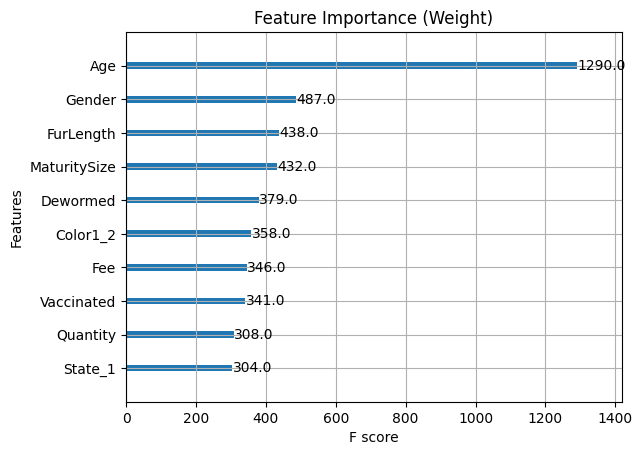

Top 10 important features:
Age: 1290.0
Gender: 487.0
FurLength: 438.0
MaturitySize: 432.0
Dewormed: 379.0
Color1_2: 358.0
Fee: 346.0
Vaccinated: 341.0
Quantity: 308.0
State_1: 304.0


In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# Plot the feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='weight', max_num_features=10, title='Feature Importance (Weight)')
plt.show()

# Step 7: Display feature importance values directly
# Get feature importance values using 'get_booster' method
importance = xgb_model.get_booster().get_score(importance_type='weight')

# Sort by importance value
importance_sorted = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Display top 10 important features
print("Top 10 important features:")
for feature, score in importance_sorted[:10]:
    print(f"{feature}: {score}")


We can see that

- age is primary contributor to the most to the model's prediction

Now we want to find its relation with the prediction.

To do this, we will be using a SHAP table

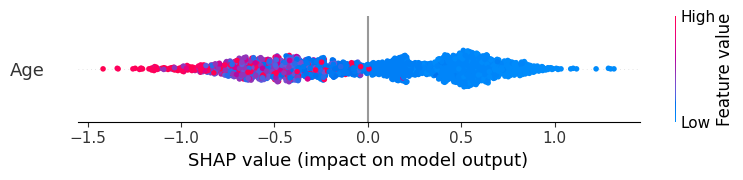

In [138]:
import shap

# Initialize SHAP explainer for the trained XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

varname = 'Age'

# Get the index of the feature
feature_index = X.columns.get_loc(varname)

# Visualize SHAP values for feature
shap.summary_plot(shap_values[:, feature_index:feature_index+1], X_test.iloc[:, feature_index:feature_index+1], feature_names=[varname])


Interpreting the SHAP Summary Plot

- blue means lower feature value
- red means higher feature value
- SHAP value represents the impact of the specified feature value on the model's prediction.

From the plot, we observe:

- Higher age values (red) are on the left, pushing the prediction towards zero, indicating slow adoption speed.
- Lower age values (blue) are on the right, pushing the prediction towards one, indicating fast adoption speed.

# 5. Conclusion

The Feature importance bar chart has shown that Age is the primary factor driving the model's prediction.

Further analysis using the SHAP summary plot reveals that younger pets tend to be adopted faster (pushing the prediction towards one), while older pets have a slower adoption rate (pushing the prediction towards zero).

The initial hypothesis that younger pets are adopted more quickly is supported by the data.

However, the relationship observed may be influenced by various factors such as gender, fur length, and vaccination. Therefore, further investigation may be needed to draw more definitive conclusion.